In [ ]:
!pip install pyswarms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#First step :- Load libraries
from keras.models import Sequential
from keras.layers import Dense      #neural net layers
import pandas as pd                  
from sklearn.model_selection import train_test_split   #to spit dataset into train,validation,test 
import matplotlib.pyplot as plt
import numpy as np
import pyswarms as ps
from sklearn.metrics import mean_squared_error
from scipy import stats
import seaborn as sns


In [ ]:
Medic= pd.read_csv('Data Medical Cost_Regresi.csv')
Medic.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
Medic.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(Medic.sex.drop_duplicates()) 
Medic.sex = le.transform(Medic.sex)
# smoker or not
le.fit(Medic.smoker.drop_duplicates()) 
Medic.smoker = le.transform(Medic.smoker)
#region
le.fit(Medic.region.drop_duplicates()) 
Medic.region = le.transform(Medic.region)
Medic.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
Medic.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

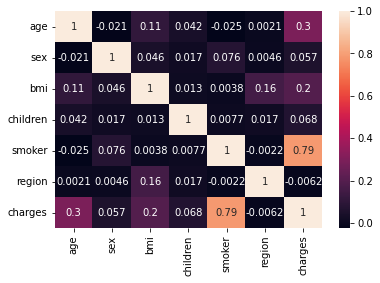

In [ ]:
korelasi = Medic.corr()
sns.heatmap(korelasi, annot = True)
plt.show()

In [ ]:
#Medic = Medic.drop(labels='sex', axis=1)
#Medic = Medic.drop(labels='children', axis=1)
Medic = Medic.drop(labels='region', axis=1)

In [ ]:
Medic.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


age             AxesSubplot(0.125,0.71587;0.168478x0.16413)
sex          AxesSubplot(0.327174,0.71587;0.168478x0.16413)
bmi          AxesSubplot(0.529348,0.71587;0.168478x0.16413)
children     AxesSubplot(0.731522,0.71587;0.168478x0.16413)
smoker         AxesSubplot(0.125,0.518913;0.168478x0.16413)
charges     AxesSubplot(0.327174,0.518913;0.168478x0.16413)
dtype: object

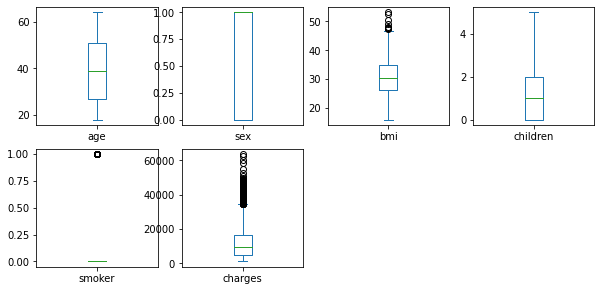

In [ ]:
Medic.plot(kind="box", subplots=True, layout=(4,4), figsize=(10,10)) 

In [ ]:
z1 = np.abs(stats.zscore(Medic["bmi"]))
threshold = 2
print(np.where(z1 > threshold))
outliers1 = np.where(z1 > threshold)
amount_outliers1 = list((int(j) for i in outliers1 for j in i))
print(len(amount_outliers1))
100* len(amount_outliers1)/len(Medic)

(array([  28,  116,  128,  172,  198,  232,  250,  286,  292,  356,  380,
        383,  401,  410,  412,  428,  438,  442,  454,  493,  521,  543,
        547,  549,  563,  572,  582,  660,  674,  680,  701,  796,  811,
        821,  847,  860,  867,  895,  930,  941,  950,  951, 1024, 1029,
       1047, 1074, 1085, 1088, 1131, 1133, 1156, 1205, 1226, 1286, 1312,
       1317, 1332]),)
57


4.260089686098655

In [ ]:
Medic.drop(outliers1[0], inplace = True)

In [ ]:
100*len(np.where(Medic["charges"]>32000))/len(Medic)

0.078064012490242

In [ ]:
Medic.drop(Medic[Medic['charges'] >32000].index, inplace = True)

In [ ]:
len(np.where(Medic["smoker"]==1))/len(Medic)

0.000881057268722467

In [ ]:
#Medic.drop(Medic[Medic['smoker'] >0].index, inplace = True)

age             AxesSubplot(0.125,0.71587;0.168478x0.16413)
sex          AxesSubplot(0.327174,0.71587;0.168478x0.16413)
bmi          AxesSubplot(0.529348,0.71587;0.168478x0.16413)
children     AxesSubplot(0.731522,0.71587;0.168478x0.16413)
smoker         AxesSubplot(0.125,0.518913;0.168478x0.16413)
charges     AxesSubplot(0.327174,0.518913;0.168478x0.16413)
dtype: object

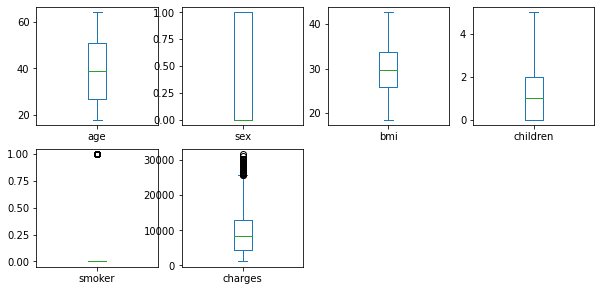

In [ ]:
Medic.plot(kind="box", subplots=True, layout=(4,4), figsize=(10,10)) 

In [ ]:
100*len(np.where(Medic["charges"]>20050))/len(Medic)

0.0881057268722467

In [ ]:
Medic.drop(Medic[Medic['charges'] >20050].index, inplace = True)

age             AxesSubplot(0.125,0.71587;0.168478x0.16413)
sex          AxesSubplot(0.327174,0.71587;0.168478x0.16413)
bmi          AxesSubplot(0.529348,0.71587;0.168478x0.16413)
children     AxesSubplot(0.731522,0.71587;0.168478x0.16413)
smoker         AxesSubplot(0.125,0.518913;0.168478x0.16413)
charges     AxesSubplot(0.327174,0.518913;0.168478x0.16413)
dtype: object

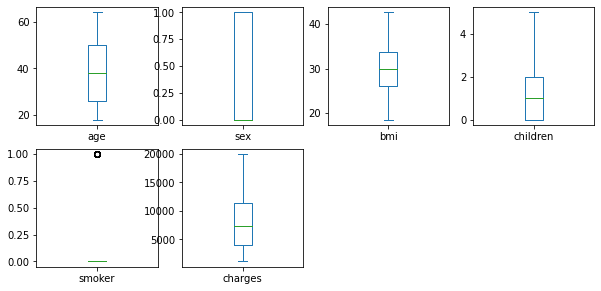

In [ ]:
Medic.plot(kind="box", subplots=True, layout=(4,4), figsize=(10,10)) 

In [ ]:
#Medic["children"] = np.where(Medic["children"]>= 1, 0, Medic['children'])

age             AxesSubplot(0.125,0.71587;0.168478x0.16413)
sex          AxesSubplot(0.327174,0.71587;0.168478x0.16413)
bmi          AxesSubplot(0.529348,0.71587;0.168478x0.16413)
children     AxesSubplot(0.731522,0.71587;0.168478x0.16413)
smoker         AxesSubplot(0.125,0.518913;0.168478x0.16413)
charges     AxesSubplot(0.327174,0.518913;0.168478x0.16413)
dtype: object

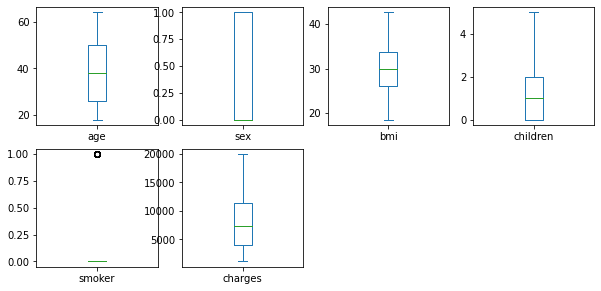

In [ ]:
Medic.plot(kind="box", subplots=True, layout=(4,4), figsize=(10,10)) 

In [ ]:
Medic

,age,sex,bmi,children,smoker,charges
0,19,0,27.90,0,1,16884.92400
1,18,1,33.77,1,0,1725.55230
2,28,1,33.00,3,0,4449.46200
4,32,1,28.88,0,0,3866.85520
5,31,0,25.74,0,0,3756.62160
...,...,...,...,...,...,...
1331,23,0,33.40,0,0,10795.93733
1333,50,1,30.97,3,0,10600.54830
1334,18,0,31.92,0,0,2205.98080
1335,18,0,36.85,0,0,1629.83350


In [ ]:
Medic.drop_duplicates()

,age,sex,bmi,children,smoker,charges
0,19,0,27.90,0,1,16884.92400
1,18,1,33.77,1,0,1725.55230
2,28,1,33.00,3,0,4449.46200
4,32,1,28.88,0,0,3866.85520
5,31,0,25.74,0,0,3756.62160
...,...,...,...,...,...,...
1331,23,0,33.40,0,0,10795.93733
1333,50,1,30.97,3,0,10600.54830
1334,18,0,31.92,0,0,2205.98080
1335,18,0,36.85,0,0,1629.83350


In [ ]:
#Medic['bmi'] = Medic['bmi'].astype(int)
#Medic['charges'] = Medic['charges'].astype(int)

In [ ]:
X = Medic.drop(columns ="charges")
y = Medic['charges']
X.shape,y.shape

((1018, 5), (1018,))

In [ ]:
X

,age,sex,bmi,children,smoker
0,19,0,27.90,0,1
1,18,1,33.77,1,0
2,28,1,33.00,3,0
4,32,1,28.88,0,0
5,31,0,25.74,0,0
...,...,...,...,...,...
1331,23,0,33.40,0,0
1333,50,1,30.97,3,0
1334,18,0,31.92,0,0
1335,18,0,36.85,0,0


In [ ]:
y

0       16884.92400
1        1725.55230
2        4449.46200
4        3866.85520
5        3756.62160
           ...     
1331    10795.93733
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1018, dtype: float64

In [ ]:
y.mean()

7994.021871266208

In [ ]:
y.var()

22521250.30262937

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y = scaler.fit_transform(y.values.reshape(-1,1))

In [ ]:
y

array([[ 1.8744031 ],
       [-1.32153505],
       [-0.74727333],
       ...,
       [-1.22024986],
       [-1.34171474],
       [-1.26200029]])

In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=42)
#train = pd.concat([X_train,y_train],axis=1)
#test = pd.concat([X_test,y_test],axis=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 5), (306, 5), (712, 1), (306, 1))

In [ ]:
y_test_inverse = scaler.inverse_transform(y_test)

In [ ]:
y_test_inverse.mean()

7967.72590748366

In [ ]:
y_test_inverse.var()

22597120.203757

In [ ]:
X_train

,age,sex,bmi,children,smoker
711,50,0,23.540,2,0
1065,42,0,25.300,1,0
228,41,0,31.635,1,0
1032,30,0,27.930,0,0
507,21,1,23.750,2,0
...,...,...,...,...,...
142,34,1,25.300,2,1
359,18,0,20.790,0,0
1134,28,1,33.820,0,0
579,25,0,23.465,0,0


In [ ]:
X.mean()

age         38.398821
sex          0.485265
bmi         30.088816
children     1.075639
smoker       0.057957
dtype: float64

In [ ]:
X.var()

age         195.777855
sex           0.250028
bmi          29.393695
children      1.497715
smoker        0.054651
dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[ 0.79831522, -0.98882646, -1.20883215,  0.76544083, -0.23744436],
       [ 0.23330484, -0.98882646, -0.8822712 , -0.06030746, -0.23744436],
       [ 0.16267855, -0.98882646,  0.29316267, -0.06030746, -0.23744436],
       ...,
       [-0.75546331,  1.01129979,  0.69858067, -0.88605575, -0.23744436],
       [-0.96734219, -0.98882646, -1.2227481 , -0.88605575, -0.23744436],
       [-1.39109997,  1.01129979,  0.75053355, -0.88605575, -0.23744436]])

In [ ]:
def calc_nn_params(n_inputs, n_hidden, n_classes):
  i_weights = n_inputs*n_hidden
  i_bias = n_hidden
  h_weights = n_hidden*n_classes
  h_bias = n_classes
  n_params = i_weights + h_bias + h_weights + h_bias

  return i_weights, i_bias, h_weights, h_bias, n_params


In [ ]:
n_inputs = 1+len(X.columns.tolist()[1:])
n_hidden = 1
n_classes = 1

i_weights, i_bias, h_weights, h_bias, n_params = calc_nn_params(n_inputs, n_hidden, n_classes)


In [ ]:
i_weights

5

In [ ]:
h_weights

1

In [ ]:
def forward_prop(params):
  W1 = params[:i_weights].reshape((n_inputs, n_hidden))
  b1 = params[i_weights:i_weights+i_bias].reshape((n_hidden,))
  W2 = params[i_weights + i_bias: i_weights + i_bias + h_weights].reshape((n_hidden, n_classes))
  b2 = params[i_weights + i_bias+ h_weights:].reshape((n_classes,))

  #Melakukan Forward Propagation
  z1 = X_train.dot(W1) + b1
  a1 = np.where(z1 > 0, z1, z1)
  z2 = a1.dot(W2) + b2

  loss = mean_squared_error(y_train, z2)

  return loss


In [ ]:
def f(x):
  n_particles = x.shape[0]
  j = [forward_prop(x[i]) for i in range(n_particles)]
  return np.array(j)


In [ ]:
def train_model(options):
  optimizer = ps.single.GlobalBestPSO(n_particles = 50, dimensions = n_params, options = options)
  #perform optimization
  cost, pos = optimizer.optimize(f, iters = 1000)

  print('\nModel Run Times:')
  return cost, pos, optimizer.cost_history


In [ ]:
def predict(X, pos):
  W1 = pos[:i_weights].reshape((n_inputs, n_hidden))
  b1 = pos[i_weights:i_weights+i_bias].reshape((n_hidden,))
  W2 = pos[i_weights + i_bias: i_weights + i_bias + h_weights].reshape((n_hidden, n_classes))
  b2 = pos[i_weights + i_bias+ h_weights:].reshape((n_classes,))

  #Melakukan Forward Propagation
  z1 = X.dot(W1) + b1
  a1 = np.where(z1 > 0, z1, z1)
  z2 = a1.dot(W2) + b2

  y_pred = z2 

  return y_pred

In [ ]:
def plot_history(history):
  plt.style.use('ggplot')
  plt.rcParams['ytick.right'] = True
  plt.rcParams['ytick.labelright'] = True
  plt.rcParams['ytick.left'] = False
  plt.rcParams['ytick.labelleft'] = False
  plt.rcParams['font.family'] = 'Arial'

  plt.ylim([min(history)-0.1, max(history)+0.1])
  plt.title('Cost History')
  plt.plot(history)

In [ ]:
checkpoint_state = np.random.get_state()

### Inisiasi Model

In [ ]:
np.random.set_state(checkpoint_state)
options = {'c1': 2.05, 'c2': 2.05, 'w' : 0.72984}
cost, pos, history = train_model(options)

2022-12-29 00:06:56,490 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 2.05, 'c2': 2.05, 'w': 0.72984}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.232
2022-12-29 00:07:28,214 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.23187792094511123, best pos: [ 1.27106441 -0.10758892  0.07761161  0.20652398  1.09997513  0.71126078
  0.56412328 -0.39886807]



Model Run Times:


2022-12-29 00:07:28,345 - matplotlib.font_manager - WARNING - findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
2022-12-29 00:07:28,384 - matplotlib.font_manager - WARNING - findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


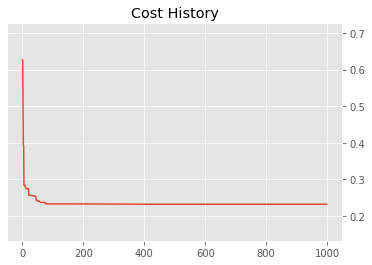

In [ ]:
plot_history(history)

In [ ]:
print(f'MSE on training set: {mean_squared_error(predict(X_train, pos),y_train)}')

MSE on training set: 0.23187792094511123


In [ ]:
print(f'MSE on test set: {mean_squared_error(predict(X_test, pos),y_test)}')

MSE on test set: 0.23472685799738222


In [ ]:
y_test.mean()

-0.00554378343902863

In [ ]:
y_test.var()

1.0043554105732906

In [ ]:
X_train_ish = predict(X_test, pos)
X_train_ish

array([[-3.59435447e-01],
       [-1.53055712e-01],
       [ 7.01315927e-01],
       [-7.56437322e-02],
       [ 6.56116554e-01],
       [ 2.29142035e+00],
       [ 3.53655291e-01],
       [-8.16402326e-01],
       [ 1.00554543e+00],
       [-1.26763877e+00],
       [-2.18570456e-01],
       [-6.36974315e-02],
       [ 7.65889128e-01],
       [ 7.36121347e-02],
       [-5.91529569e-01],
       [ 5.38148490e-01],
       [-5.87918886e-01],
       [ 3.92316798e-01],
       [-1.03795787e+00],
       [ 1.09331228e+00],
       [-9.44351397e-01],
       [ 7.53108832e-01],
       [-4.78968918e-02],
       [ 5.08095975e-01],
       [-1.20522213e+00],
       [ 3.69904322e-01],
       [-1.11350294e+00],
       [ 5.07774541e-02],
       [-1.15048307e+00],
       [-7.39922879e-01],
       [-3.35320714e-02],
       [-1.13449546e+00],
       [ 3.10159790e-01],
       [-8.50261858e-01],
       [ 1.55766481e-01],
       [-3.59392730e-01],
       [ 2.61587405e-01],
       [-6.10823287e-01],
       [-1.2

In [ ]:
y_testish = np.concatenate((X_train_ish, y_test), axis = 1)

In [ ]:
y_testish

array([[-3.59435447e-01, -5.49969536e-01],
       [-1.53055712e-01, -3.37404372e-01],
       [ 7.01315927e-01,  6.65515954e-01],
       [-7.56437322e-02, -3.54237386e-01],
       [ 6.56116554e-01,  7.88868057e-01],
       [ 2.29142035e+00,  2.53316251e+00],
       [ 3.53655291e-01,  1.11310354e-01],
       [-8.16402326e-01, -7.79569409e-01],
       [ 1.00554543e+00,  1.27536179e+00],
       [-1.26763877e+00, -1.44354983e+00],
       [-2.18570456e-01, -4.07909869e-01],
       [-6.36974315e-02, -3.81315061e-01],
       [ 7.65889128e-01,  9.98661958e-01],
       [ 7.36121347e-02, -2.55657751e-01],
       [-5.91529569e-01, -7.50550795e-01],
       [ 5.38148490e-01,  5.49743198e-01],
       [-5.87918886e-01, -6.90293343e-01],
       [ 3.92316798e-01,  2.98732067e-01],
       [-1.03795787e+00, -1.26755822e+00],
       [ 1.09331228e+00,  1.24241598e+00],
       [-9.44351397e-01, -1.11619045e+00],
       [ 7.53108832e-01,  8.11372252e-01],
       [-4.78968918e-02, -3.00000036e-01],
       [ 5.

In [ ]:
y_test_inverse.mean()

7967.72590748366

In [ ]:
y_test_inverse.std()

4753.642835106251

In [ ]:
y_test_inverse[0]

array([5385.3379])

In [ ]:
5385.3379 - 7967.72590748366

-2582.3880074836597

In [ ]:
-2582.3880074836597 / 4753.642835106251

-0.5432440124471277

In [ ]:
-0.54996954 * 4753.642835106251 + 7967.72590748366

5353.367144135979

In [ ]:
-0.41363629 * 4753.642835106251 + 7967.72590748366

6001.446721185229

In [ ]:
for i in range(len(y_testish)):
  for j in range(len(y_testish[i])):
    y_testish[i][j] = y_testish[i][j]* y_test_inverse.std()  + y_test_inverse.mean()

print (y_testish)

[[ 6259.09817066  5353.36716362]
 [ 7240.15371894  6363.82603323]
 [11301.53133719 11131.35105603]
 [ 7608.14262208  6283.80789447]
 [11086.66966234 11717.72289495]
 [18860.31985742 20009.47571797]
 [ 9648.87684571  8496.85557428]
 [ 4086.84084182  4261.9313741 ]
 [12747.72973765 14030.34035266]
 [ 1941.82395707  1105.60559843]
 [ 6928.72002656  6028.66808355]
 [ 7664.9310687   6155.09029781]
 [11608.48927503 12715.00816973]
 [ 8317.65170438  6752.42027265]
 [ 5155.80560857  4399.87549801]
 [10525.89161982 10581.00872339]
 [ 5172.96950624  4686.31790489]
 [ 9832.65984251  9387.79145521]
 [ 3033.64492946  1942.20683964]
 [13164.94197052 13873.72770653]
 [ 3478.61665363  2661.75515374]
 [11547.73631304 11824.69980089]
 [ 7740.04119089  6541.63288388]
 [10383.03270047 10334.48235897]
 [ 2238.53037777 11463.92780291]
 [ 9726.11893515  8774.04725136]
 [ 2674.53064543  2489.63183988]
 [ 8209.10378857  7391.93210817]
 [ 2498.74029664  1877.80354473]
 [ 4450.3968172   3525.95154346]
 [ 7808.32

In [ ]:
X_test_inverse = scaler.inverse_transform(X_test)

In [ ]:
X_test_inverse

array([[34.   ,  0.   , 26.41 ,  1.   ,  0.   ],
       [40.   ,  1.   , 29.355,  1.   ,  0.   ],
       [53.   ,  0.   , 26.7  ,  2.   ,  0.   ],
       ...,
       [41.   ,  1.   , 34.2  ,  2.   ,  0.   ],
       [57.   ,  0.   , 38.   ,  2.   ,  0.   ],
       [50.   ,  1.   , 25.3  ,  0.   ,  0.   ]])

In [ ]:
X_overview = np.concatenate((X_test_inverse, y_testish), axis = 1)

In [ ]:
X_overview

array([[3.40000000e+01, 0.00000000e+00, 2.64100000e+01, ...,
        0.00000000e+00, 6.25909817e+03, 5.35336716e+03],
       [4.00000000e+01, 1.00000000e+00, 2.93550000e+01, ...,
        0.00000000e+00, 7.24015372e+03, 6.36382603e+03],
       [5.30000000e+01, 0.00000000e+00, 2.67000000e+01, ...,
        0.00000000e+00, 1.13015313e+04, 1.11313511e+04],
       ...,
       [4.10000000e+01, 1.00000000e+00, 3.42000000e+01, ...,
        0.00000000e+00, 8.12530410e+03, 7.23385208e+03],
       [5.70000000e+01, 0.00000000e+00, 3.80000000e+01, ...,
        0.00000000e+00, 1.27008334e+04, 1.26300311e+04],
       [5.00000000e+01, 1.00000000e+00, 2.53000000e+01, ...,
        0.00000000e+00, 9.03356728e+03, 8.41734699e+03]])

In [ ]:
x_overview_df = pd.DataFrame(X_overview)

In [ ]:
x_overview_df

,0,1,2,3,4,5,6
0,34.0,0.0,26.410,1.0,0.0,6259.098171,5353.367164
1,40.0,1.0,29.355,1.0,0.0,7240.153719,6363.826033
2,53.0,0.0,26.700,2.0,0.0,11301.531337,11131.351056
3,37.0,0.0,30.800,2.0,0.0,7608.142622,6283.807894
4,58.0,1.0,28.595,0.0,0.0,11086.669662,11717.722895
...,...,...,...,...,...,...,...
301,31.0,1.0,39.490,1.0,0.0,5464.945636,3840.479463
302,43.0,1.0,26.030,0.0,0.0,7376.630855,6808.556623
303,41.0,1.0,34.200,2.0,0.0,8125.304102,7233.852077
304,57.0,0.0,38.000,2.0,0.0,12700.833403,12630.031117


In [ ]:
x_overview_df

,0,1,2,3,4,5,6
0,34.0,0.0,26.410,1.0,0.0,6259.098171,5353.367164
1,40.0,1.0,29.355,1.0,0.0,7240.153719,6363.826033
2,53.0,0.0,26.700,2.0,0.0,11301.531337,11131.351056
3,37.0,0.0,30.800,2.0,0.0,7608.142622,6283.807894
4,58.0,1.0,28.595,0.0,0.0,11086.669662,11717.722895
...,...,...,...,...,...,...,...
301,31.0,1.0,39.490,1.0,0.0,5464.945636,3840.479463
302,43.0,1.0,26.030,0.0,0.0,7376.630855,6808.556623
303,41.0,1.0,34.200,2.0,0.0,8125.304102,7233.852077
304,57.0,0.0,38.000,2.0,0.0,12700.833403,12630.031117


In [ ]:
x_overview_df.rename(columns = {0:'age', 1:'sex',
                              2:'bmi', 3: 'children', 4:  'smoker', 5 : 'predicted_charges', 6: 'charges'}, inplace = True)
   

In [ ]:
x_overview_df

,age,sex,bmi,children,smoker,predicted_charges,charges
0,34.0,0.0,26.410,1.0,0.0,6259.098171,5353.367164
1,40.0,1.0,29.355,1.0,0.0,7240.153719,6363.826033
2,53.0,0.0,26.700,2.0,0.0,11301.531337,11131.351056
3,37.0,0.0,30.800,2.0,0.0,7608.142622,6283.807894
4,58.0,1.0,28.595,0.0,0.0,11086.669662,11717.722895
...,...,...,...,...,...,...,...
301,31.0,1.0,39.490,1.0,0.0,5464.945636,3840.479463
302,43.0,1.0,26.030,0.0,0.0,7376.630855,6808.556623
303,41.0,1.0,34.200,2.0,0.0,8125.304102,7233.852077
304,57.0,0.0,38.000,2.0,0.0,12700.833403,12630.031117


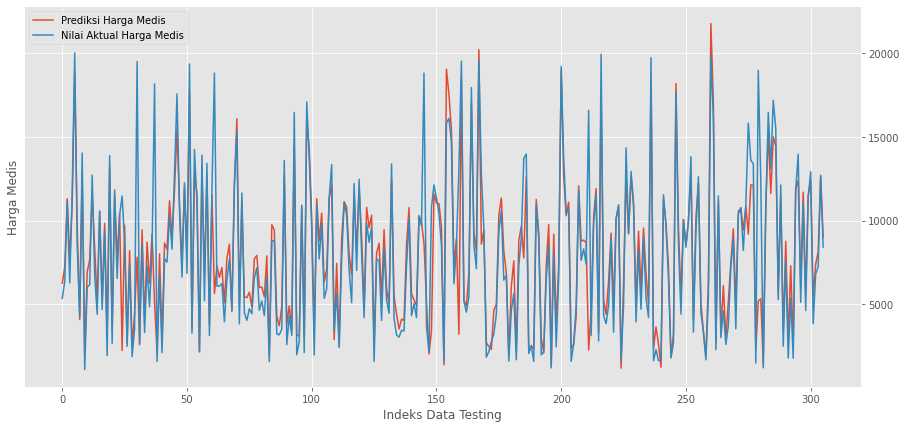

In [ ]:
# importing package
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
a = []
for x in range(len(X_test)):
   a.append(x)
plt.plot(a, y_testish[:,0], label = "Prediksi Harga Medis")
plt.plot(a, y_testish[:,1], label = "Nilai Aktual Harga Medis")
plt.xlabel("Indeks Data Testing")
plt.ylabel("Harga Medis")
plt.legend()
plt.show()